## Import
Import **pandas** and **matplotlib**.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating Clusters in Dataset 8 using k-Means Algorithm

Import the `KMeans` class.

In [23]:
from kmeans import KMeans_py

## Dataset 8
For this notebook, we will work on dataset 8. The group decided to assume that this is a clustering dataset. This decision was based on a number of factors. First, there is a class variable. The presence of a class variable suggests that the observations are trying to be grouped in some way. Second, the values are continuous. Continuous values rule out the possibility that these are item counts; which in turn makes it unlikely to be a rule mining dataset. The granularity of the values, which goes up to 5 decimal places, hints that it is not some sort of user rating either. This is further supported by the presence of negative values which rules out the possibility of implicitly generated ratings.


If you view the `.csv` file in Excel, you can see that our dataset contains 900 **observations** (rows) across 10 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **f1**
- **f2**
- **f3**
- **f4**
- **f5**
- **f6**
- **f7**
- **f8**
- **f9**
- **f10**

For this dataset we will assume that each of the rows represents a medical record for one person. Each variable represenets some kind of health metric such as blood sugar, blood pressure, etc. They will be grouped into 3 classes based on their health records. NOT FINAL

Let us read the dataset.

In [24]:
dataset_df = pd.read_csv('Dataset8.csv')

Let us display the general `info` of the dataset

In [25]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  900 non-null    int64  
 1   f1          900 non-null    float64
 2   f2          900 non-null    float64
 3   f3          900 non-null    float64
 4   f4          900 non-null    float64
 5   f5          900 non-null    float64
 6   f6          900 non-null    float64
 7   f7          900 non-null    float64
 8   f8          900 non-null    float64
 9   f9          900 non-null    float64
 10  f10         900 non-null    float64
 11  class       900 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 84.5 KB


Let us proceed to finding the number of observation per group prior to clustering

In [26]:
print("Class 1 : " , dataset_df.loc[dataset_df['class'] == 0].count().loc['class'])
print("Class 2 : " , dataset_df.loc[dataset_df['class'] == 1].count().loc['class'])
print("Class 3 : " , dataset_df.loc[dataset_df['class'] == 2].count().loc['class'])

Class 1 :  300
Class 2 :  300
Class 3 :  300


E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


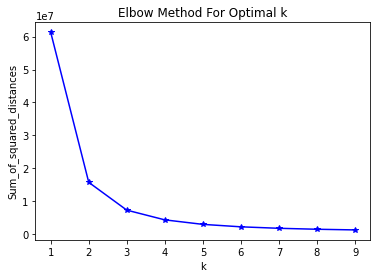

In [27]:
# Import required packages
from sklearn.cluster import KMeans
sse = []
list_k = range(1,10)
for k in list_k:
    km = KMeans(n_clusters = k)
    km = km.fit(dataset_df)
    sse.append(km.inertia_)

plt.plot(list_k, sse, 'b*-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


From the elbow method, we can see that the optimal k is 3.

Instantiate a `KMeans` object with `k` equal to `3`, `start_var` equal to `1`, `end_var` equal to `5`, `num_observations` equal to `150`, and `data` equal to the `DataFrame` object which represents the dataset. 

In [28]:
kmeans = KMeans_py(3, 1, 11, 900, dataset_df)

Initialize the centroids.

In [29]:
kmeans.initialize_centroids(dataset_df)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,-5.710850,15.094523,10.923855,38.565110,33.292183,57.282370,54.949177,65.369141,84.635297,86.999744
1,-4.267853,-16.263877,33.946826,32.118864,60.628451,50.805646,67.131122,78.154488,65.519522,91.300920
2,-0.846899,13.283446,29.694957,29.343965,63.831882,42.928793,81.862522,53.293976,96.324544,101.543847


Cluster the dataset.

In [30]:
groups = kmeans.train(dataset_df, 300)

Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10
Iteration  11
Iteration  12
Iteration  13
Iteration  14
Iteration  15
Iteration  16
Iteration  17
Iteration  18
Iteration  19
Iteration  20
Iteration  21
Iteration  22
Iteration  23
Iteration  24
Iteration  25
Iteration  26
Iteration  27
Iteration  28
Iteration  29
Iteration  30
Iteration  31
Done clustering!


In [31]:
cluster_0 = dataset_df.loc[groups == 0]
cluster_1 = dataset_df.loc[groups == 1]
cluster_2 = dataset_df.loc[groups == 2]

# print(cluster_0.loc[cluster_0['class'] == 0])
print('Number of data points in each cluster:')
print('Cluster 0:')
print('Class 0:\t', cluster_0.loc[cluster_0['class'] == 0].shape[0])
print('Class 1:\t', cluster_0.loc[cluster_0['class'] == 1].shape[0])
print('Class 2:\t', cluster_0.loc[cluster_0['class'] == 2].shape[0])
print('Cluster 1:')
print('Class 0:\t', cluster_1.loc[cluster_1['class'] == 0].shape[0])
print('Class 1:\t', cluster_1.loc[cluster_1['class'] == 1].shape[0])
print('Class 2:\t', cluster_1.loc[cluster_1['class'] == 2].shape[0])
print('Cluster 2:')
print('Class 0:\t', cluster_2.loc[cluster_2['class'] == 0].shape[0])
print('Class 1:\t', cluster_2.loc[cluster_2['class'] == 1].shape[0])
print('Class 2:\t', cluster_2.loc[cluster_2['class'] == 2].shape[0])

Number of data points in each cluster:
Cluster 0:
Class 0:	 106
Class 1:	 87
Class 2:	 98
Cluster 1:
Class 0:	 114
Class 1:	 121
Class 2:	 83
Cluster 2:
Class 0:	 80
Class 1:	 92
Class 2:	 119


In [32]:
# syn_new_df = pd.concat([syn_df.iloc[:, 0:2], groups.rename('group')], axis=1)
# dataset_new_df = pd.concat([dataset_df.iloc[:, 1:11], groups.rename('group')], axis=1)
# print(dataset_new_df.head(3))

# print(syn_new_df.head(5))
# fig, axs = plt.subplots(1, 2, figsize=(10,5))
# fig, axs = plt.subplots(1, 2, figsize=(10,5))
# axs[0].plot(syn_df.loc[syn_df['class'] == 0, 'x'], syn_df.loc[syn_df['class'] == 0, 'y'], 'r+')
# axs[0].plot(syn_df.loc[syn_df['class'] == 1, 'x'], syn_df.loc[syn_df['class'] == 1, 'y'], 'g+')
# axs[0].plot(syn_df.loc[syn_df['class'] == 2, 'x'], syn_df.loc[syn_df['class'] == 2, 'y'], 'b+')
# axs[0].plot(dataset_df.loc[dataset_df['class'] == 0, 'x'], dataset_df.loc[dataset_df['class'] == 0, 'y'], 'r+')
# axs[0].plot(dataset_df.loc[dataset_df['class'] == 1, 'x'], dataset_df.loc[dataset_df['class'] == 1, 'y'], 'r+')
# axs[0].plot(dataset_df.loc[dataset_df['class'] == 2, 'x'], dataset_df.loc[dataset_df['class'] == 2, 'y'], 'r+')

# axs[1].plot(syn_new_df.loc[syn_new_df['group'] == 0, 'x'], syn_new_df.loc[syn_new_df['group'] == 0, 'y'], 'r+')
# axs[1].plot(syn_new_df.loc[syn_new_df['group'] == 1, 'x'], syn_new_df.loc[syn_new_df['group'] == 1, 'y'], 'g+')
# axs[1].plot(syn_new_df.loc[syn_new_df['group'] == 2, 'x'], syn_new_df.loc[syn_new_df['group'] == 2, 'y'], 'b+')

# for i in range(len(kmeans.centroids)):
#     axs[1].plot(kmeans.centroids.iloc[i]['x'], kmeans.centroids.iloc[i]['y'], 'k*', ms=12)

# axs[0].grid()
# axs[1].grid()

In [33]:
kmeans = KMeans_py(3, 1, 11, 900, dataset_df)
kmeans.initialize_centroids(dataset_df)
groups = kmeans.train(dataset_df, 300)
cluster_0 = dataset_df.loc[groups == 0]
cluster_1 = dataset_df.loc[groups == 1]
cluster_2 = dataset_df.loc[groups == 2]

# print(cluster_0.loc[cluster_0['class'] == 0])
print('Number of data points in each cluster:')
print('Cluster 0:')
print('Class 0:\t', cluster_0.loc[cluster_0['class'] == 0].shape[0])
print('Class 1:\t', cluster_0.loc[cluster_0['class'] == 1].shape[0])
print('Class 2:\t', cluster_0.loc[cluster_0['class'] == 2].shape[0])
print('Cluster 1:')
print('Class 0:\t', cluster_1.loc[cluster_1['class'] == 0].shape[0])
print('Class 1:\t', cluster_1.loc[cluster_1['class'] == 1].shape[0])
print('Class 2:\t', cluster_1.loc[cluster_1['class'] == 2].shape[0])
print('Cluster 2:')
print('Class 0:\t', cluster_2.loc[cluster_2['class'] == 0].shape[0])
print('Class 1:\t', cluster_2.loc[cluster_2['class'] == 1].shape[0])
print('Class 2:\t', cluster_2.loc[cluster_2['class'] == 2].shape[0])
# print(cluster_2.loc[cluster_2['class'] == 2].shape[0] + cluster_0.loc[cluster_0['class'] == 2].shape[0] + cluster_1.loc[cluster_1['class'] == 2].shape[0])
# print(cluster_2.loc[cluster_2['class'] == 0].shape[0] + cluster_0.loc[cluster_0['class'] == 0].shape[0] + cluster_1.loc[cluster_1['class'] == 0].shape[0])
# print(cluster_2.loc[cluster_2['class'] == 1].shape[0] + cluster_0.loc[cluster_0['class'] == 1].shape[0] + cluster_1.loc[cluster_1['class'] == 1].shape[0])


Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10
Iteration  11
Iteration  12
Iteration  13
Iteration  14
Iteration  15
Iteration  16
Iteration  17
Iteration  18
Iteration  19
Iteration  20
Iteration  21
Iteration  22
Iteration  23
Iteration  24
Iteration  25
Iteration  26
Iteration  27
Iteration  28
Iteration  29
Iteration  30
Iteration  31
Done clustering!
Number of data points in each cluster:
Cluster 0:
Class 0:	 106
Class 1:	 87
Class 2:	 98
Cluster 1:
Class 0:	 114
Class 1:	 121
Class 2:	 83
Cluster 2:
Class 0:	 80
Class 1:	 92
Class 2:	 119


106-87-98
114-121-83
80-92-119